1.

Ans. Number of multiplications : n x m x k   
     Number of additions : n x m x (k-1)

The resulting matrix (A) of this operation will be a n x m matrix, where this n x m is the number of elements in the new matrix. For each element of       the resulting matrix (A) we will need to perform multiplication of elements along the row of the first matrix and corresponding column of the            second matrix and so on. since the resulting matrix has n x m elements, and each element has performed k multiplications, the total number of              multiplications is n x m x k.

For each of n x m elemnts, you perform k-1 additions, so total additions performed is n x m x (k-1).

2. 

i. using list of lists

In [1]:
def matrixmultiplicationlists(matrix1, matrix2):

    n = len(matrix1)
    k = len(matrix1[0])
    m = len(matrix2[0])

    ansmatrix = [[0 for l in range(m)] for l in range(n)]

    for i in range(n):
        for j in range(m):
            for l in range(k):
                ansmatrix[i][j] += matrix1[i][l] * matrix2[l][j]

    return ansmatrix 
    



ii. using numpy

In [2]:
import numpy as np
import time

n, k, m = 100,30,70
A = np.random.rand(n, k)
B = np.random.rand(k, m)

# Matrix multiplication using list of lists
startTime = time.time()
resultList = matrixmultiplicationlists(A.tolist(), B.tolist())
listTime = time.time() - startTime

startTime = time.time()
resultNumpy = np.dot(A, B)
numpyTime = time.time() - startTime


print("Time using list of lists in seconds: ", listTime)
print("Time using NumPy in seconds", numpyTime)


Time using list of lists in seconds:  0.02542901039123535
Time using NumPy in seconds 0.0026564598083496094


This shows that Numpy approach is faster. 
NumPy is faster because it uses highly optimized code written in C and performs operations on entire arrays at once, avoiding the slow loops that Python lists require.

3. 


In [3]:
import numpy as np
import timeit

# better method to find the median of the array is:
def findmediansorted(arr):
    sorted_arr = sorted(arr)
    n = len(sorted_arr)

    if n % 2 == 0:
        return (sorted_arr[n // 2 - 1] + sorted_arr[n // 2]) / 2
    else:
        return sorted_arr[n // 2]

# Numpy Approach

def findmedian(arr):
    return np.median(arr)

arr = [5,8,1,7,4,5,3,6,9,7]

# comparing time taken for both approaches

timemediansorted = timeit.timeit(lambda: findmediansorted(arr), number=1000)

timenumpymedian = timeit.timeit(lambda: findmedian(arr), number=1000)

print("Time for sorted method: in seconds ", timemediansorted)
print("Time for NumPy's median: in seconds ",timenumpymedian)

Time for sorted method: in seconds  0.0007669000187888741
Time for NumPy's median: in seconds  0.02543919999152422


using the method suggested in the question the time complexity would be O(n).
sorting method - findmediansorted(arr) has time complexity of O(nlogn) , whereas the numpy's median has a time complexity of O(n)
using NumPy's median function is preferable to sorting due to better average performance and less time taken.





4.

given function:
f(x,y)= $x^2y + y^3sin(x)$   

partial derivative w.r.t x:
$df/dx=2xy+y^3cos(x)$   

partial derivative w.r.t y:
$df/dy=x^2+sinx3y^2$

5. 

In [20]:
import jax
import jax.numpy as jnp

def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

def analyticalGradient(x, y):
    dfbydx = 2*x* y + y**3 * jnp.cos(x)
    dfbydy = x**2 + 3 * y**2 * jnp.sin(x)
    return jnp.array([dfbydx, dfbydy])

gradF = jax.grad(f, argnums=(0, 1))

rng = jax.random.PRNGKey(0)
xValues = jax.random.uniform(rng, shape=(5,))
yValues = jax.random.uniform(rng, shape=(5,))

for x, y in zip(xValues, yValues):
    analyticalResult = analyticalGradient(x, y)
    jaxResult = gradF(x, y)

    print("Analytical Gradient: ",analyticalResult)
    print("JAX Gradient: ",jaxResult)
    print()

Analytical Gradient:  [0.8192759 0.8681149]
JAX Gradient:  (Array(0.8192759, dtype=float32), Array(0.8681149, dtype=float32))

Analytical Gradient:  [0.0208603  0.01290422]
JAX Gradient:  (Array(0.0208603, dtype=float32), Array(0.01290422, dtype=float32))

Analytical Gradient:  [0.36528587 0.33223233]
JAX Gradient:  (Array(0.36528587, dtype=float32), Array(0.33223233, dtype=float32))

Analytical Gradient:  [2.046779  2.6697807]
JAX Gradient:  (Array(2.046779, dtype=float32), Array(2.6697807, dtype=float32))

Analytical Gradient:  [0.8874234 0.9557172]
JAX Gradient:  (Array(0.8874234, dtype=float32), Array(0.9557172, dtype=float32))



from here we see that that the gradient found using jax, matches the analytical gradient value.

7.

In [25]:
records = {
    2022: {
        'Branch 1': {
            'Roll Number': 1,
            'Name': 'N',
            'Marks': {
                'Maths': 100,
                'English': 70,
            }
        },
        'Branch 2': {
        },
    },
    2023: {
        'Branch 1': {
        },
        'Branch 2': {
        },
    },
    2024: {
        'Branch 1': {
        },
        'Branch 2': {
        },
    },
    2025: {
        'Branch 1': {
        },
        'Branch 2': {
        },
    },
}


print(records[2022]['Branch 1'])


{'Roll Number': 1, 'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}}


8. 

In [7]:
class Student:
    def __init__(self, rollnum, name, marks):
        self.rollnum = rollnum
        self.name = name
        self.marks = marks  

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []  

    def addstudent(self, student):
        self.students.append(student)

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []  

    def addbranch(self, branch):
        self.branches.append(branch)

s1 = Student(1, 'A', {'Science': 85, 'English': 78})
s2 = Student(2, 'B', {'Science': 95, 'English': 85})

branch1 = Branch('Branch 1')
branch1.addstudent(s1)

branch2 = Branch('Branch 2')
branch2.addstudent(s2)

year2024 = Year(2024)
year2024.addbranch(branch1)
year2024.addbranch(branch2)

print(year2024.branches[0].students[0].rollnum)
print(year2024.branches[0].students[0].name)
print(year2024.branches[0].students[0].marks)

1
A
{'Science': 85, 'English': 78}


9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.
    i. y=x


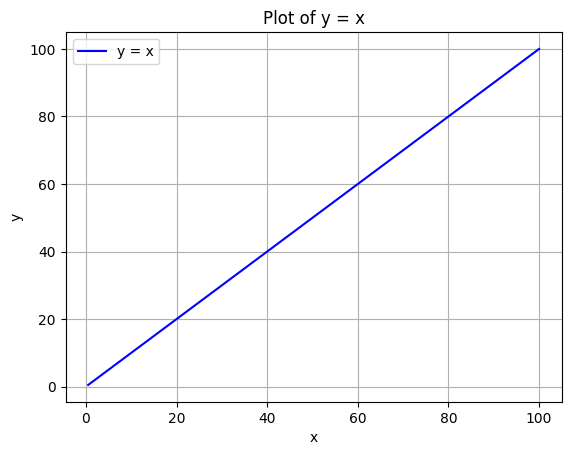

In [8]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.5, 100.5, 0.5)  
y = x  

plt.plot(x, y, label='y = x', color='blue')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x')
plt.legend()

plt.grid()
plt.show()


2. y=$x^2$

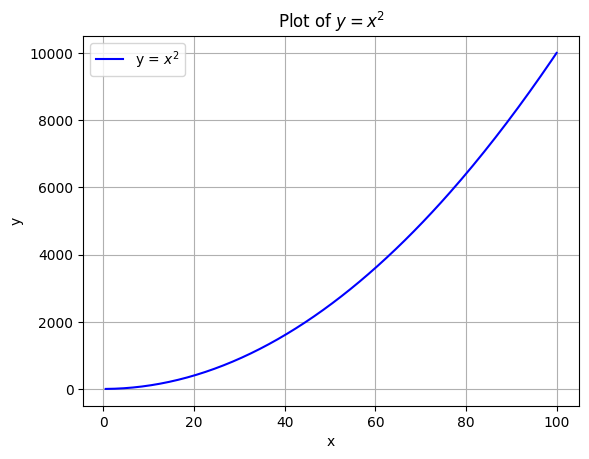

In [29]:
x = np.arange(0.5, 100.5, 0.5)  
y = x*x  

plt.plot(x, y, label='y = $x^2$', color='blue')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of $y = x^2$')
plt.legend()

plt.grid()
plt.show()


3. y=$x^3/100$

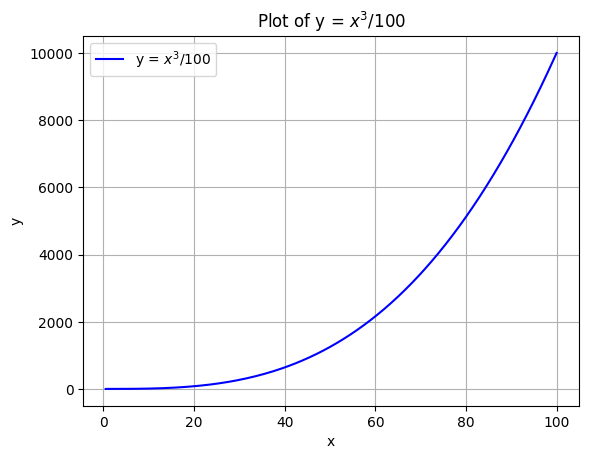

In [30]:
x = np.arange(0.5, 100.5, 0.5)  
y = (x**3)/100 

plt.plot(x, y, label='y = $x^3/100$', color='blue')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = $x^3/100$')
plt.legend()

plt.grid()
plt.show()


4. y=sin(x)

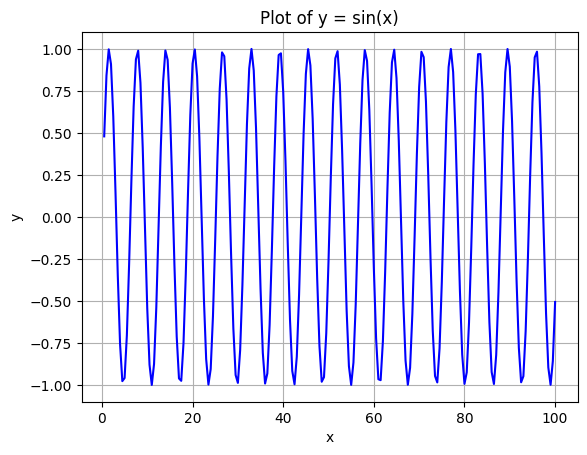

In [11]:
x = np.arange(0.5, 100.5, 0.5)  
y = np.sin(x)  

plt.plot(x, y, label='y = sin(x)', color='blue')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = sin(x)')

plt.grid()
plt.show()


5. y= sin(x)/x

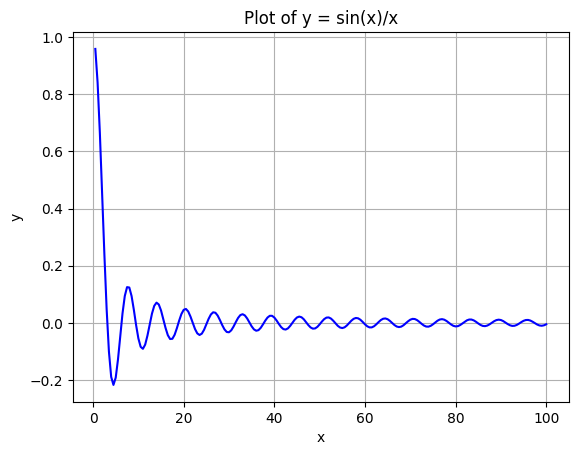

In [12]:
x = np.arange(0.5, 100.5, 0.5)  
y = np.sin(x)/x  

plt.plot(x, y, label='y = sin(x)/x', color='blue')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = sin(x)/x')

plt.grid()
plt.show()


6. y=log x

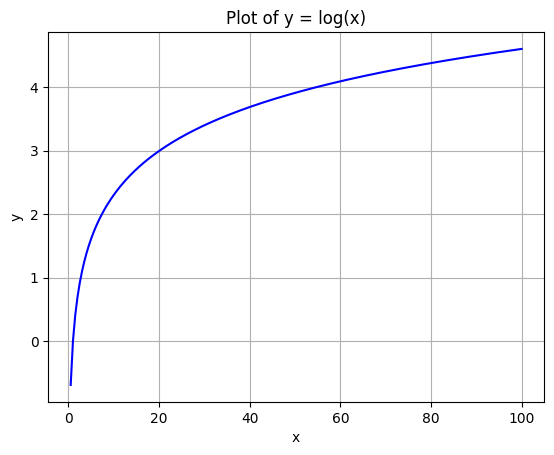

In [13]:
x = np.arange(0.5, 100.5, 0.5)  
y = np.log(x)   

plt.plot(x, y, label='y = log(x)', color='blue')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = log(x)')

plt.grid()
plt.show()


7. y = $e^x$

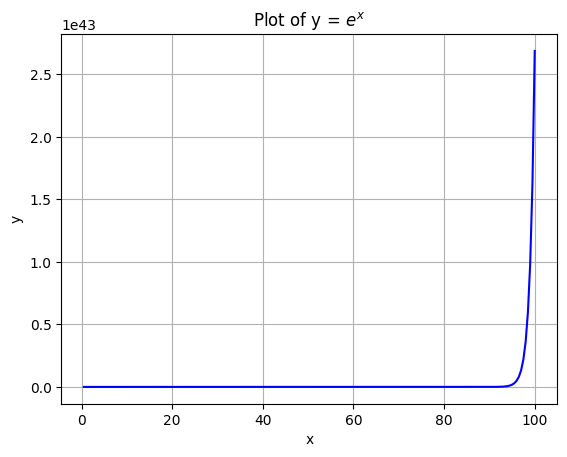

In [31]:
x = np.arange(0.5, 100.5, 0.5)  
y = np.exp(x)  

plt.plot(x, y, label='y = $e^x$', color='blue')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = $e^x$')

plt.grid()
plt.show()


10. 

In [15]:
import numpy as np
import pandas as pd

randommatrix = np.random.uniform(1, 2, size=(20, 5))

df = pd.DataFrame(randommatrix, columns=["a", "b", "c", "d", "e"])

maxstdcolumn = df.std().idxmax()

minmeanrow = df.mean(axis=1).idxmin()

print("DataFrame:")
print(df)
print("Column with the highest standard deviation:", maxstdcolumn)
print("Row with the lowest mean:", minmeanrow)

DataFrame:
           a         b         c         d         e
0   1.122820  1.693664  1.238386  1.517552  1.716497
1   1.586730  1.889742  1.006523  1.948445  1.568068
2   1.053753  1.932172  1.828886  1.852639  1.113194
3   1.709621  1.423295  1.411251  1.365942  1.163902
4   1.255083  1.500175  1.576040  1.238034  1.766371
5   1.988448  1.176946  1.543453  1.175515  1.797045
6   1.970683  1.571692  1.922956  1.864266  1.105212
7   1.978511  1.096272  1.076705  1.846681  1.425595
8   1.100641  1.229456  1.262593  1.700113  1.186849
9   1.867535  1.076610  1.286942  1.820607  1.660645
10  1.559299  1.903050  1.225690  1.076924  1.968508
11  1.428723  1.348598  1.054543  1.886131  1.258258
12  1.858014  1.482771  1.780887  1.975527  1.325952
13  1.914868  1.110113  1.293429  1.305174  1.247435
14  1.527506  1.088154  1.778992  1.169046  1.152150
15  1.321817  1.996035  1.425505  1.643268  1.558524
16  1.712078  1.917596  1.109948  1.346018  1.682709
17  1.885927  1.237202  1.811899  1

11.

In [16]:
import numpy as np
import pandas as pd

randommatrix = np.random.uniform(1, 2, size=(20, 5))

df = pd.DataFrame(randommatrix, columns=["a", "b", "c", "d", "e"])

df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)

df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

lt8rows = (df['g'] == 'LT8').sum()

stdlt8 = df.loc[df['g'] == 'LT8', 'f'].std()
stdgt8 = df.loc[df['g'] == 'GT8', 'f'].std()

print(df)
print("\nNumber of rows where the value in the column 'g' is 'LT8':", lt8rows)
print("Standard deviation of 'f' for rows where 'g' is 'LT8':", stdlt8)
print("Standard deviation of 'f' for rows where 'g' is 'GT8':", stdgt8)


           a         b         c         d         e         f    g
0   1.614025  1.155501  1.703998  1.154322  1.032164  6.660011  LT8
1   1.136239  1.094974  1.268029  1.340651  1.480605  6.320497  LT8
2   1.397416  1.651754  1.459054  1.675244  1.771869  7.955337  LT8
3   1.514351  1.773506  1.434243  1.194389  1.155701  7.072190  LT8
4   1.305813  1.303549  1.027924  1.060563  1.234136  5.931984  LT8
5   1.585191  1.742627  1.332207  1.169224  1.811542  7.640792  LT8
6   1.824666  1.115052  1.287073  1.767858  1.541734  7.536384  LT8
7   1.031705  1.534282  1.505347  1.983969  1.278772  7.334075  LT8
8   1.932250  1.173423  1.133772  1.033594  1.647297  6.920336  LT8
9   1.867073  1.965761  1.640296  1.070367  1.768288  8.311785  GT8
10  1.814306  1.113015  1.876689  1.599786  1.496651  7.900447  LT8
11  1.508070  1.768695  1.910048  1.776508  1.869349  8.832669  GT8
12  1.382624  1.741431  1.353574  1.300737  1.133185  6.911551  LT8
13  1.665879  1.000394  1.674472  1.584606  1.00

12. 

In [17]:
import numpy as np

matrix1 = np.array([[1, 2, 3],
                    [4, 5, 6],
                    [7, 8, 9]])

matrix2 = np.array([[10],
                    [20],
                    [30]])

result = matrix1 + matrix2

print("Matrix1: ", matrix1)
print("Matrix2: ", matrix2)
print("Result (Matrix1 + Matrix2): ", result)
print(result.shape)

Matrix1:  [[1 2 3]
 [4 5 6]
 [7 8 9]]
Matrix2:  [[10]
 [20]
 [30]]
Result (Matrix1 + Matrix2):  [[11 12 13]
 [24 25 26]
 [37 38 39]]
(3, 3)


Broadcasting in NumPy refers to the ability to perform arithmetic operations on arrays of different shapes. 
Matrix1 is a 2D array with shape (3, 3).
Matrix2 is a 2D array with shape (3, 1).
When we add matrix2 to matrix1, NumPy broadcasts matrix2 across the columns of matrix1. So, the shape of the resulting array will be (3, 3).

13. 

In [18]:
import numpy as np

matrix = np.random.uniform(1,15,size=(3,3))

def minindex(arr):
    arr=arr.ravel()
    minimumindex=0

    for index, value in enumerate(arr):
            if value < arr[minimumindex]:
                minimumindex = index
    
    return minimumindex

# function
ans=minindex(matrix)

print("the minimum index is: ",ans)

# using np.argmin
ans2=np.argmin(matrix)
print("the minimum index is: ",ans2)

the minimum index is:  8
the minimum index is:  8


hence we can see that the answer from both is coming to be same.